In [35]:
import os
os.chdir("C:/Users/Pooja Kathe/Downloads")
import pandas as pd

rv=pd.read_csv("RestaurantVisitors.csv",index_col="date",parse_dates=True)

In [36]:
rv

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [37]:
rv.isna().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [38]:
rv1=rv

In [4]:
rv=rv.dropna()

In [5]:
rv.shape

(478, 8)

In [6]:
import matplotlib.pyplot as plt

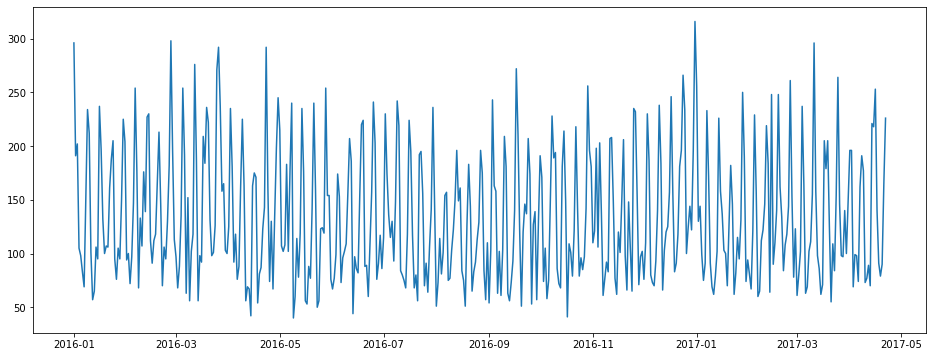

In [7]:
plt.figure(figsize=(16,6))
plt.plot(rv.total)

In [8]:
rv[rv["holiday"]==1].index   ## to get the index position  for holiday

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [9]:
index_pos=rv[rv["holiday"]==1].index 

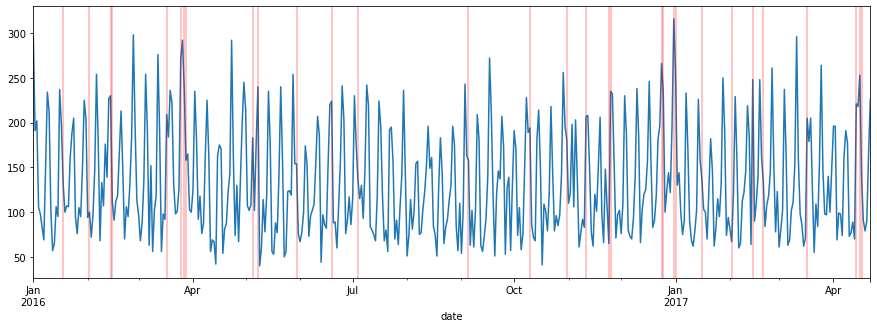

In [10]:
ax=rv["total"].plot(figsize=(15,5))        ##axvline used for vertical line and it show the holiday
for day in index_pos:
    ax.axvline(x=day,color="red",alpha=.3)

In [33]:
from statsmodels.tsa.seasonal  import seasonal_decompose

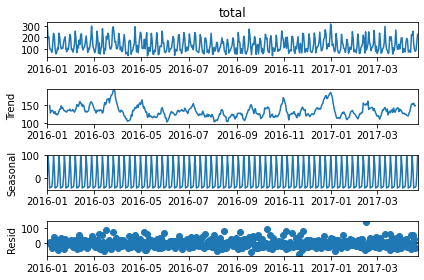

In [34]:
rv_seasonal=seasonal_decompose(rv["total"])   ## this graph use for only data  follow seasonal pettrn or not
rv_seasonal.plot();                           ## data is seasonal

### train test split

In [13]:
train_rv=rv.iloc[0:450]
test_rv=rv.iloc[450:479]

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [15]:
auto_arima(rv["total"],seasonal=True,m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [16]:
model1=SARIMAX(train_rv["total"],order=(0, 0, 0),seasonal_order=(1, 0, 1, 7))
result=model1.fit()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [17]:
pred_rv=result.predict(start=450,end=477)   
pred_rv

2017-03-26    174.190864
2017-03-27     90.608737
2017-03-28     95.759552
2017-03-29     95.480050
2017-03-30     96.689025
2017-03-31    145.286002
2017-04-01    232.774350
2017-04-02    174.179915
2017-04-03     90.603042
2017-04-04     95.753533
2017-04-05     95.474049
2017-04-06     96.682948
2017-04-07    145.276870
2017-04-08    232.759718
2017-04-09    174.168966
2017-04-10     90.597347
2017-04-11     95.747514
2017-04-12     95.468047
2017-04-13     96.676870
2017-04-14    145.267738
2017-04-15    232.745087
2017-04-16    174.158018
2017-04-17     90.591652
2017-04-18     95.741495
2017-04-19     95.462047
2017-04-20     96.670793
2017-04-21    145.258607
2017-04-22    232.730457
Freq: D, Name: predicted_mean, dtype: float64

In [18]:
test_rv.shape

(28, 8)

In [19]:
len(pred_rv)

28

In [20]:
test_rv[test_rv["holiday"]==1].index

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

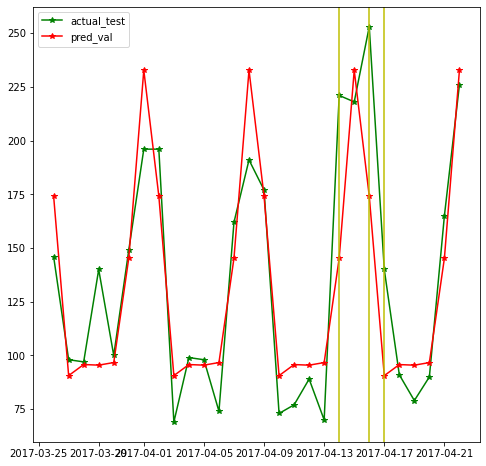

In [21]:
plt.figure(figsize=(8,8))
plt.plot(test_rv.total,marker="*",color="g",label="actual_test")
plt.plot(pred_rv,color="r",marker="*",label="pred_val")
plt.legend()
plt.axvline(x="2017-04-14",color="y")
plt.axvline(x="2017-04-16",color="y")
plt.axvline(x="2017-04-17",color="y")

at hoilday actual values is very high but predicted values low , our model is not good to handel for holiday

In [22]:
## MSC
error=test_rv.total -pred_rv

In [23]:
error

date
2017-03-26   -28.190864
2017-03-27     7.391263
2017-03-28     1.240448
2017-03-29    44.519950
2017-03-30     3.310975
2017-03-31     3.713998
2017-04-01   -36.774350
2017-04-02    21.820085
2017-04-03   -21.603042
2017-04-04     3.246467
2017-04-05     2.525951
2017-04-06   -22.682948
2017-04-07    16.723130
2017-04-08   -41.759718
2017-04-09     2.831034
2017-04-10   -17.597347
2017-04-11   -18.747514
2017-04-12    -6.468047
2017-04-13   -26.676870
2017-04-14    75.732262
2017-04-15   -14.745087
2017-04-16    78.841982
2017-04-17    49.408348
2017-04-18    -4.741495
2017-04-19   -16.462047
2017-04-20    -6.670793
2017-04-21    19.741393
2017-04-22    -6.730457
dtype: float64

In [24]:
import numpy as np          ## 875 is the mse
MSE=np.mean(np.square(error))  
MSE

875.4817753102388

In [25]:
### tile this point only SARIMA is used not SARIMAX

### SARIMAX

In [26]:
auto_arima(rv["total"],seasonal=True,m=7,exogenous=rv[["holiday"]])    ## that exogenous is allways is dataframe

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [27]:
model2=SARIMAX(train_rv["total"],order=(1, 0, 0),seasonal_order=(1, 0, 1, 7),exog=train_rv[["holiday"]])
result1=model2.fit()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
pred_rv_exog=result1.predict(start=450,end=477,exog=test_rv[["holiday"]])   
pred_rv_exog

2017-03-26    176.358277
2017-03-27     81.860489
2017-03-28     93.016639
2017-03-29     95.450841
2017-03-30     92.489609
2017-03-31    138.966727
2017-04-01    228.765143
2017-04-02    169.414730
2017-04-03     80.490850
2017-04-04     92.742556
2017-04-05     95.392415
2017-04-06     92.473837
2017-04-07    138.956625
2017-04-08    228.751485
2017-04-09    169.404835
2017-04-10     80.486171
2017-04-11     92.737180
2017-04-12     95.386888
2017-04-13     92.468479
2017-04-14    207.890459
2017-04-15    228.738232
2017-04-16    238.336904
2017-04-17    149.423392
2017-04-18     92.731806
2017-04-19     95.381361
2017-04-20     92.463121
2017-04-21    138.940524
2017-04-22    228.724979
Freq: D, Name: predicted_mean, dtype: float64

In [29]:
## MSC
error=test_rv.total -pred_rv_exog

In [30]:
import numpy as np          ## 875 is the mse
MSE=np.mean(np.square(error))  
MSE

359.1922405246633

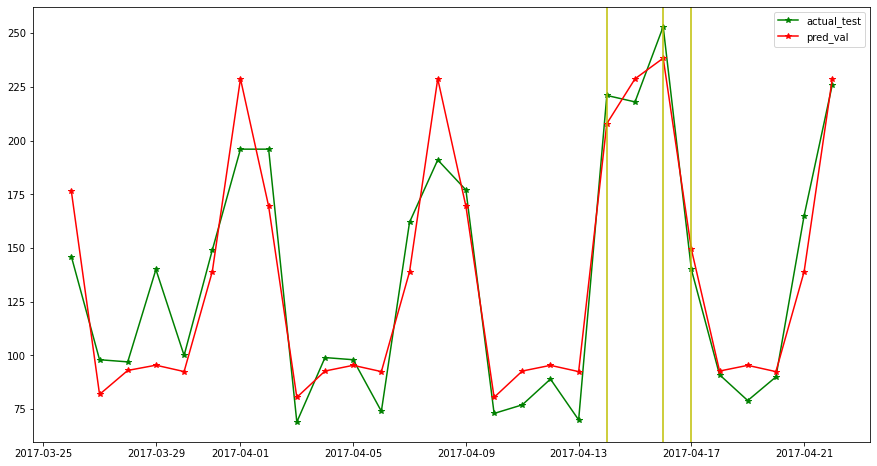

In [31]:
plt.figure(figsize=(15,8))
plt.plot(test_rv.total,marker="*",color="g",label="actual_test")
plt.plot(pred_rv_exog,color="r",marker="*",label="pred_val")
plt.legend()
plt.axvline(x="2017-04-14",color="y")
plt.axvline(x="2017-04-16",color="y")
plt.axvline(x="2017-04-17",color="y")

### again compare the sarima MSE And sarimax MSE

In [32]:
### sarimax MSE is low than the sarima model ,so sarimax handel the holiday  also 

### forecasting for nan values

In [40]:
rv1.tail(39)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-01,Monday,0,na,NaN,NaN,NaN,NaN,NaN


In [47]:
rv1=rv1.iloc[449:517,]

In [48]:
rv1.tail(39)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-01,Monday,0,na,NaN,NaN,NaN,NaN,NaN


In [49]:
pred_rv_exog=result1.predict(start=489,end=517,exog=rv1[["holiday"]])   
pred_rv_exog

2017-05-04     92.452407
2017-05-05    138.924424
2017-05-06    297.640360
2017-05-07    169.365577
2017-05-08     80.467519
2017-05-09     92.715689
2017-05-10     95.364783
2017-05-11     92.447051
2017-05-12    138.916375
2017-05-13    228.685224
2017-05-14    169.355764
2017-05-15    149.404741
2017-05-16     92.710317
2017-05-17     95.359258
2017-05-18     92.441694
2017-05-19    138.908326
2017-05-20    228.671974
2017-05-21    169.345952
2017-05-22     80.458195
2017-05-23     92.704945
2017-05-24     95.353733
2017-05-25     92.436338
2017-05-26    138.900278
2017-05-27    228.658725
2017-05-28    169.336140
2017-05-29     80.453533
2017-05-30    161.641459
2017-05-31     95.348208
2017-06-01     92.430983
Freq: D, Name: predicted_mean, dtype: float64

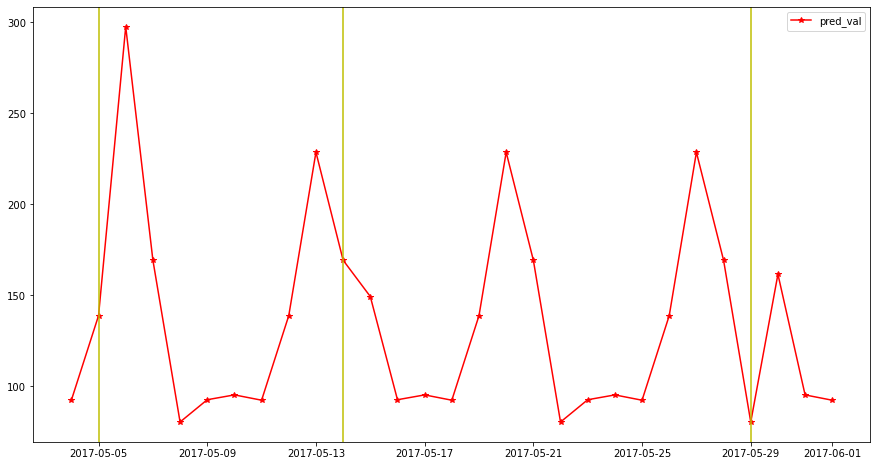

In [50]:
plt.figure(figsize=(15,8))
##plt.plot(test_rv.total,marker="*",color="g",label="actual_test")
plt.plot(pred_rv_exog,color="r",marker="*",label="pred_val")
plt.legend()
plt.axvline(x="2017-05-05",color="y")
plt.axvline(x="2017-05-14",color="y")
plt.axvline(x="2017-05-29",color="y")

In [ ]:
4